# Preço do Abacate

Context
It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold
Acknowledgements
Many thanks to the Hass Avocado Board for sharing this data!!

http://www.hassavocadoboard.com/retail/volume-and-price-data

Inspiration
In which cities can millenials have their avocado toast AND buy a home?

Was the Avocadopocalypse of 2017 real?

Fonte: https://www.kaggle.com/neuromusic/avocado-prices

In [1]:
#BIBLIOTECAS IMPORTADAS
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

In [10]:
#LENDO AS PLANILHAS
avocado = pd.read_csv('avocado.csv', sep=',')

In [11]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [12]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [26]:
#ESCREVENDO AS COLUNAS DE DATAS NO FORMATO DATETIME
avocado["Date"] = pd.to_datetime(avocado["Date"])
avocado["Date"]

0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

In [24]:
avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [25]:
avocado['region'].nunique()

54

In [21]:
avocado['Total Volume'].value_counts(dropna=False)

3713.49      2
3529.44      2
2038.99      2
569349.05    2
4103.97      2
            ..
238229.99    1
344613.01    1
322940.72    1
2943.85      1
10187.56     1
Name: Total Volume, Length: 18237, dtype: int64

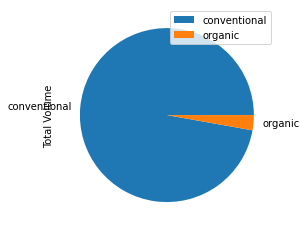

In [47]:
avocado.groupby(['type']).sum().plot(kind='pie', y='Total Volume')

Text(0, 0.5, 'Density')

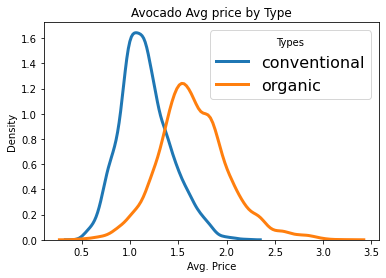

In [51]:
# List of types
types = ['conventional', 'organic']

# Iterate through the five airlines
for i in types:
    # Subset to the airline
    subset = avocado[avocado['type'] == i]
    
    # Draw the density plot
    sns.distplot(subset['AveragePrice'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Types')
plt.title('Avocado Avg price by Type')
plt.xlabel('Avg. Price')
plt.ylabel('Density')

Text(0.5, 1.0, 'Avg Price of avocado  over time')

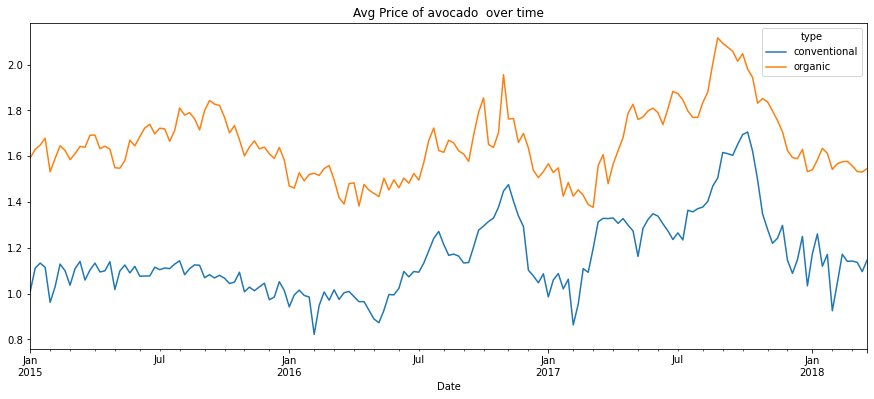

In [53]:
#Theres is approx. 108 prices per day, lets calculate the mean.
fig,ax = plt.subplots(figsize=(15,6))
avocado.groupby(['Date','type']).mean()['AveragePrice'].unstack().plot(ax=ax)
plt.title('Avg Price of avocado  over time')

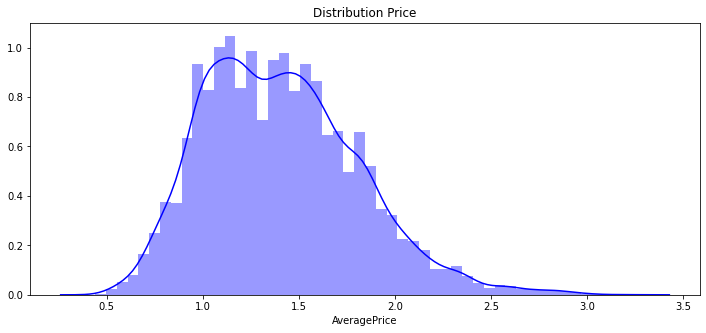

In [66]:
pl.figure(figsize=(12,5))
pl.title("Distribution Price")
ax = sns.distplot(avocado["AveragePrice"], color = 'blue')

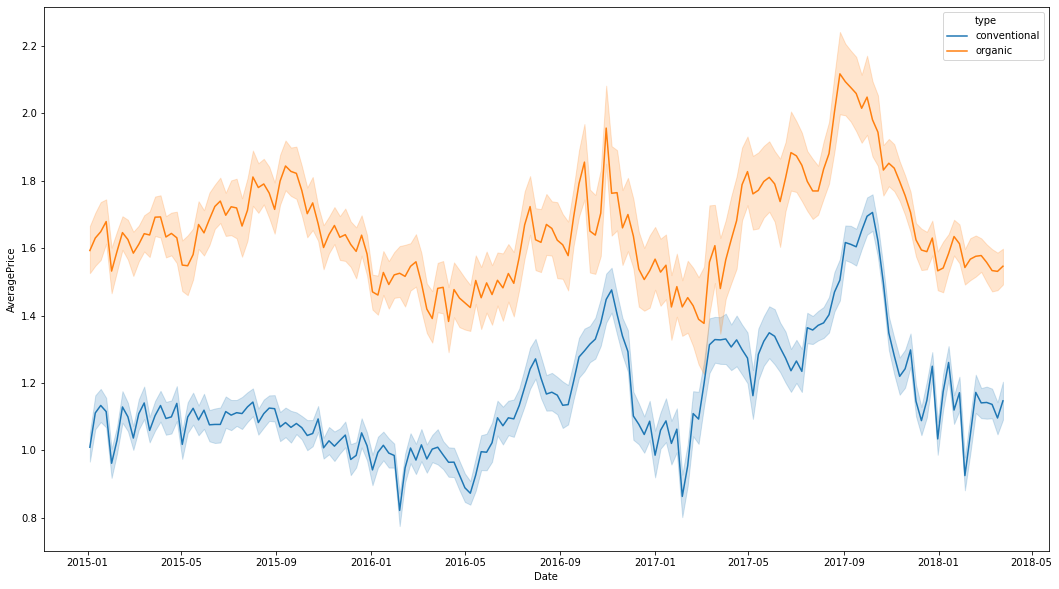

In [72]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Date", y="AveragePrice", hue='type', data=avocado)
plt.show()

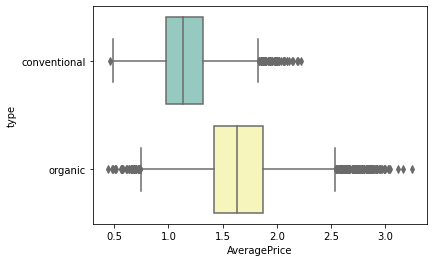

In [65]:
sns.boxplot(y="type", x="AveragePrice", data=avocado, palette = 'Set3')


C:\Users\malta\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\malta\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


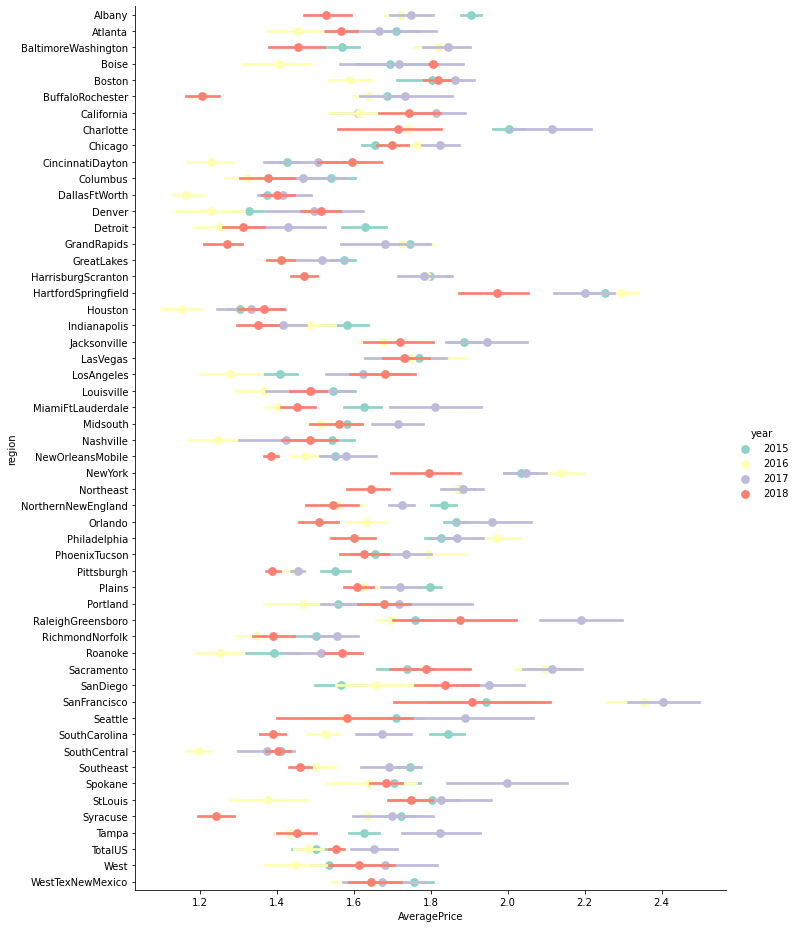

In [67]:
mask = avocado['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=avocado[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='Set3',
                   join=False,
              )

C:\Users\malta\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\malta\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


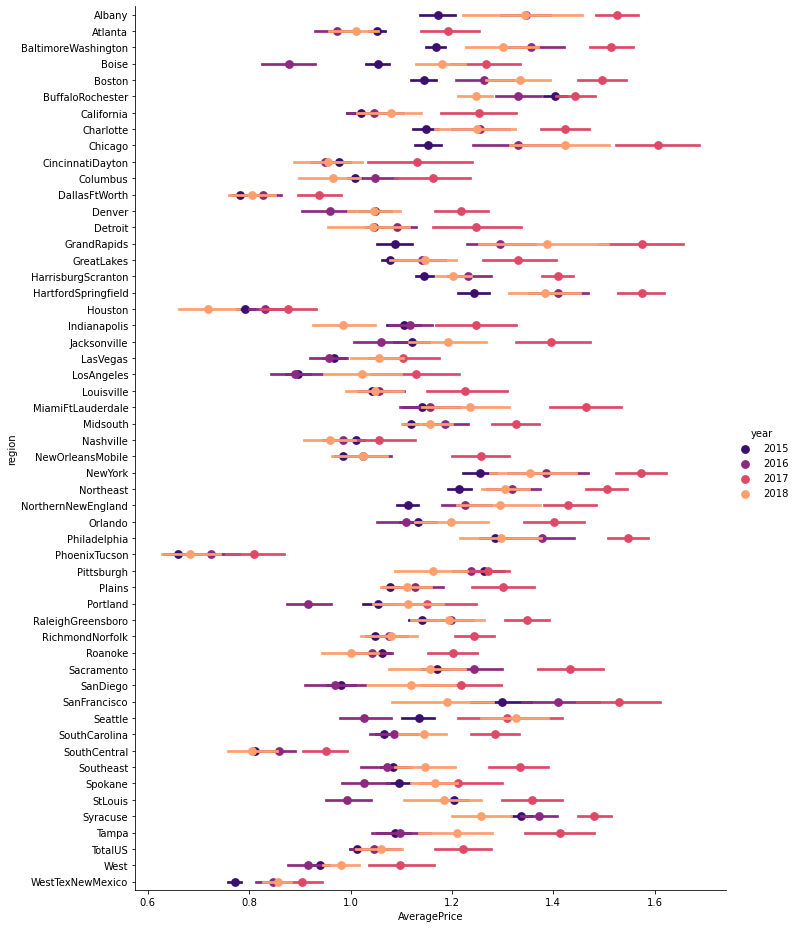

In [68]:
mask = avocado['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=avocado[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

In [75]:
avocado.groupby(['region','year'],as_index=False)['Total Volume'].agg('mean')

,region,year,Total Volume
0,Albany,2015,3.874900e+04
1,Albany,2016,5.061861e+04
2,Albany,2017,4.935455e+04
3,Albany,2018,6.424942e+04
4,Atlanta,2015,2.233817e+05
...,...,...,...
211,West,2018,3.853212e+06
212,WestTexNewMexico,2015,4.031456e+05
213,WestTexNewMexico,2016,4.212253e+05
214,WestTexNewMexico,2017,4.556691e+05


Text(0.5, 1.0, 'Average Price of Avocado According to Region')

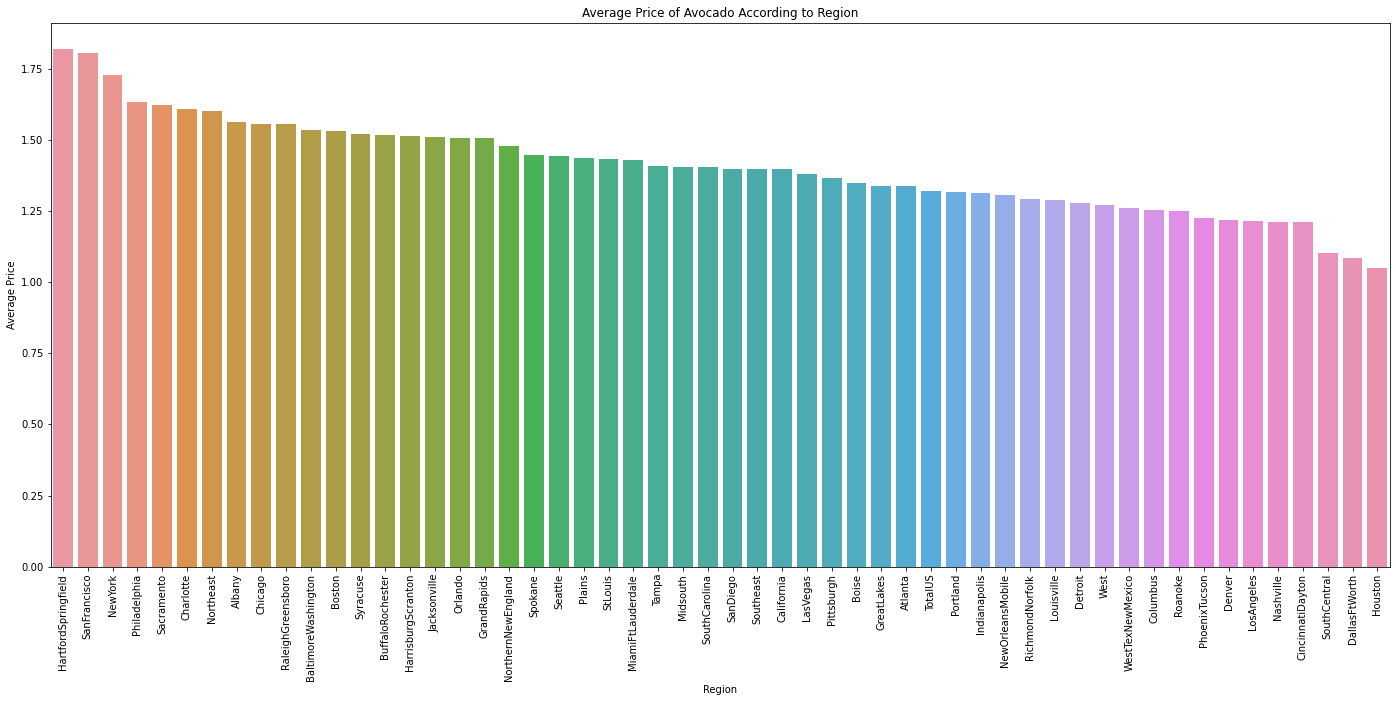

In [77]:
region_list=list(avocado.region.unique())
average_price=[]

for i in region_list:
    x=avocado[avocado.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

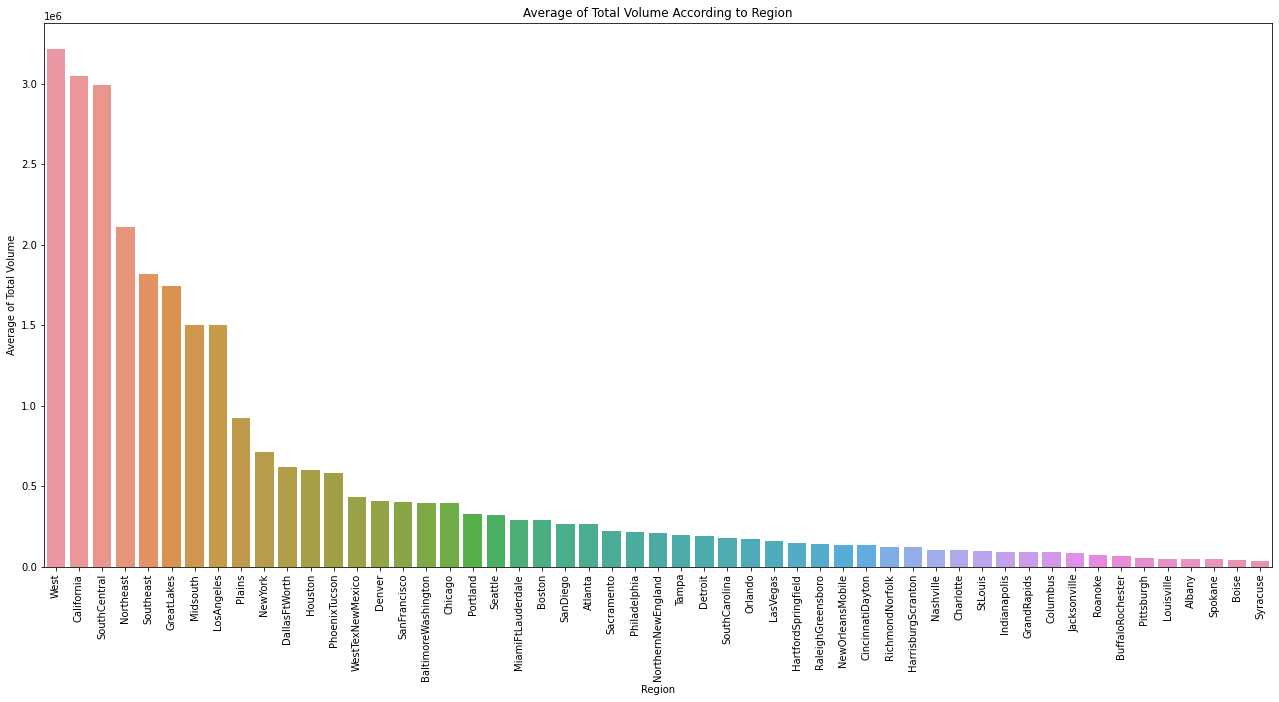

In [78]:
filter1=avocado.region!='TotalUS'
df1=avocado[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')